In [1]:
path = 'example.txt'

In [2]:
open(path).readline()

'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

In [3]:
import json
path = 'example.txt'
records = [json.loads(line) for line in open(path)]

In [4]:
records

[{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
  'al': 'en-US,en;q=0.8',
  'c': 'US',
  'cy': 'Danvers',
  'g': 'A6qOVH',
  'gr': 'MA',
  'h': 'wfLQtf',
  'hc': 1331822918,
  'hh': '1.usa.gov',
  'l': 'orofrog',
  'll': [42.576698, -70.954903],
  'nk': 1,
  'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
  't': 1331923247,
  'tz': 'America/New_York',
  'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991'},
 {'a': 'GoogleMaps/RochesterNY',
  'c': 'US',
  'cy': 'Provo',
  'g': 'mwszkS',
  'gr': 'UT',
  'h': 'mwszkS',
  'hc': 1308262393,
  'hh': 'j.mp',
  'l': 'bitly',
  'll': [40.218102, -111.613297],
  'nk': 0,
  'r': 'http://www.AwareMap.com/',
  't': 1331923249,
  'tz': 'America/Denver',
  'u': 'http://www.monroecounty.gov/etc/911/rss.php'},
 {'a': 'Mozilla/4.0 (compatible; MSIE 8.0; Windows NT 6.1; WOW64; Trident/4.0; SLCC2; .NET CLR 2.0.50727; .NET CLR 3.5.30729; .NET CLR 3.0.30729; Media Center PC 6.0

# 用纯Python代码对时区进行计数

In [8]:
time_zones = [rec['tz'] for rec in records if 'tz' in rec]

In [10]:
time_zones[:9]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '']

In [11]:
def get_counts(sequence):
    counts = {}
    for x in sequence:
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1
    return counts

In [12]:
from collections import defaultdict

def get_counts2(sequence):
    counts = defaultdict(int) # values will initialize to 0
    for x in sequence:
        counts[x] += 1
    return counts

In [13]:
counts = get_counts(time_zones)

In [14]:
counts['America/New_York']

1251

In [15]:
len(time_zones)

3440

In [16]:
def top_counts(count_dict, n=10):
    value_key_pairs = [(count, tz) for tz, count in count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-n:]

In [17]:
top_counts(counts)

[(33, 'America/Sao_Paulo'),
 (35, 'Europe/Madrid'),
 (36, 'Pacific/Honolulu'),
 (37, 'Asia/Tokyo'),
 (74, 'Europe/London'),
 (191, 'America/Denver'),
 (382, 'America/Los_Angeles'),
 (400, 'America/Chicago'),
 (521, ''),
 (1251, 'America/New_York')]

# 用pandas对时区进行计数

In [18]:
import pandas as pd

frame = pd.DataFrame(records)

frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
_heartbeat_    120 non-null float64
a              3440 non-null object
al             3094 non-null object
c              2919 non-null object
cy             2919 non-null object
g              3440 non-null object
gr             2919 non-null object
h              3440 non-null object
hc             3440 non-null float64
hh             3440 non-null object
kw             93 non-null object
l              3440 non-null object
ll             2919 non-null object
nk             3440 non-null float64
r              3440 non-null object
t              3440 non-null float64
tz             3440 non-null object
u              3440 non-null object
dtypes: float64(4), object(14)
memory usage: 500.7+ KB


In [19]:
frame['tz'][:10]

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
5     America/New_York
6        Europe/Warsaw
7                     
8                     
9                     
Name: tz, dtype: object

In [20]:
tz_counts = frame['tz'].value_counts()
tz_counts[:10]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

In [21]:
clean_tz = frame['tz'].fillna('Missing')

clean_tz[clean_tz == ''] = 'Unknown'

tz_counts = clean_tz.value_counts()

tz_counts[:10]

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

<IPython.core.display.Javascript object>


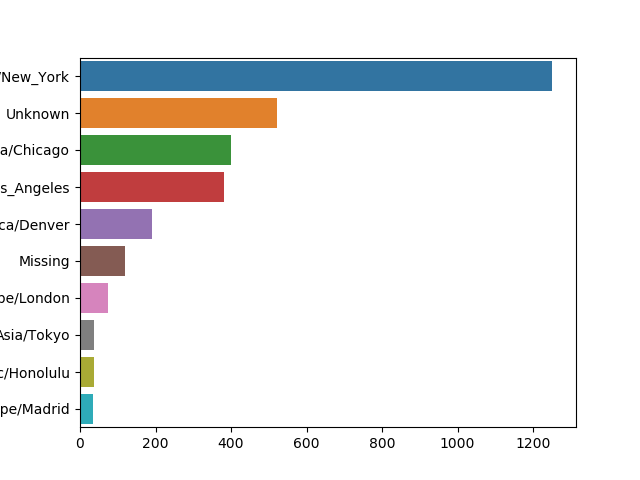

In [26]:
%matplotlib notebook
import seaborn as sns
import numpy as np
subset = tz_counts[:10]
sns.barplot(y=subset.index, x=subset.values)

In [27]:
cframe = frame[frame.a.notnull()]

In [28]:
cframe['os'] = np.where(cframe['a'].str.contains('Windows'),'Windows', 'Not Windows')

C:\Users\David\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [29]:
cframe['os'][:5]

0        Windows
1    Not Windows
2        Windows
3    Not Windows
4        Windows
Name: os, dtype: object

In [30]:
by_tz_os = cframe.groupby(['tz', 'os'])

In [31]:
agg_counts = by_tz_os.size().unstack().fillna(0)

In [34]:
agg_counts[-10:]

os                Not Windows  Windows
tz                                    
Europe/Sofia              0.0      1.0
Europe/Stockholm          2.0     12.0
Europe/Uzhgorod           0.0      1.0
Europe/Vienna             3.0      3.0
Europe/Vilnius            0.0      2.0
Europe/Volgograd          0.0      1.0
Europe/Warsaw             1.0     15.0
Europe/Zurich             4.0      0.0
Pacific/Auckland          3.0      8.0
Pacific/Honolulu          0.0     36.0

In [39]:
# Rearrange the data for plotting
indexer = agg_counts.sum(1).argsort()
count_subset = agg_counts.take(indexer[-10:])
count_subset = count_subset.stack()
count_subset.name = 'total'
count_subset = count_subset.reset_index()
count_subset[:10]

tz           os  total
0  America/Sao_Paulo  Not Windows   13.0
1  America/Sao_Paulo      Windows   20.0
2      Europe/Madrid  Not Windows   16.0
3      Europe/Madrid      Windows   19.0
4   Pacific/Honolulu  Not Windows    0.0
5   Pacific/Honolulu      Windows   36.0
6         Asia/Tokyo  Not Windows    2.0
7         Asia/Tokyo      Windows   35.0
8      Europe/London  Not Windows   43.0
9      Europe/London      Windows   31.0

<IPython.core.display.Javascript object>


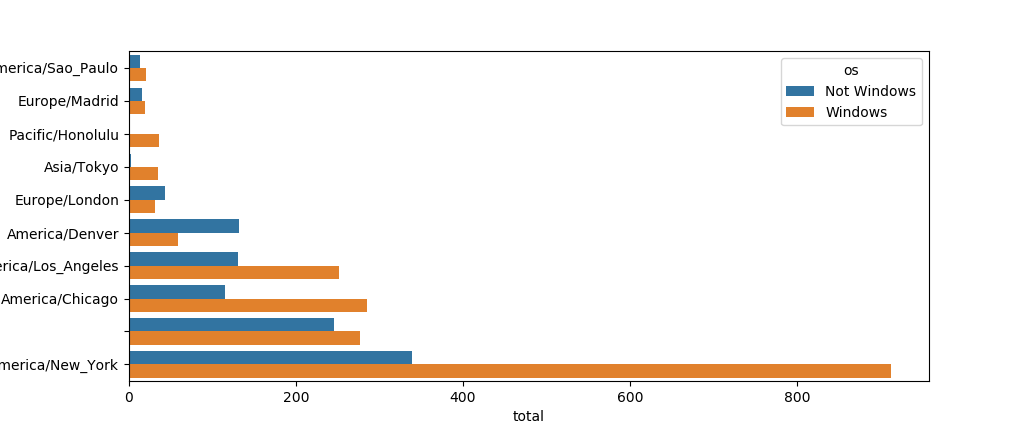

In [40]:
sns.barplot(x='total', y='tz', hue='os',  data=count_subset)

In [41]:
def norm_total(group):
    group['normed_total'] = group.total / group.total.sum()
    return group

results = count_subset.groupby('tz').apply(norm_total)

<IPython.core.display.Javascript object>


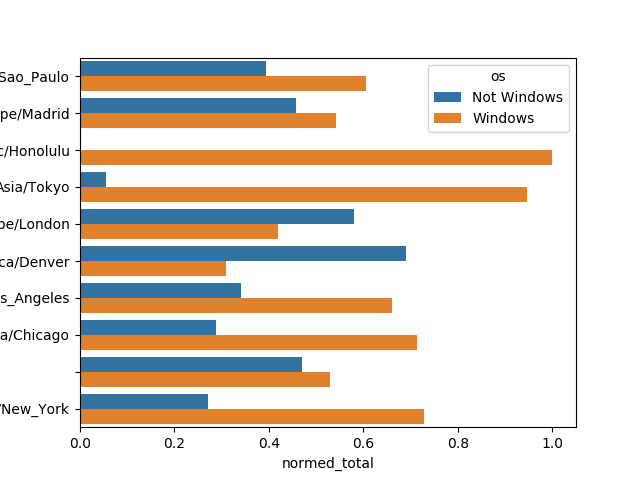

In [42]:
sns.barplot(x='normed_total', y='tz', hue='os',  data=results)